In [2]:
import os
def loadData(input_folder):
    if not os.path.exists(input_folder):
        return []
    else:
        return os.listdir(input_folder)
input_folder = "./storage/processed/"
data = loadData(input_folder)

In [3]:
data

['028954bf-1e37-493f-b319-1f5658b482e6.jpg',
 '03e36bdb-7b45-4b87-8b10-0cde1b286f10.jpg',
 '046fb9c9-5442-4aa9-ab53-21a27deb58bf.jpg',
 '10c6859c-154a-4e26-bc87-58aa980edb35.jpg',
 '16a3c7cf-3735-4d51-808f-02797d5c193f.jpg',
 '212ffbd8-b7e2-4219-bb60-c24215683efd.jpg',
 '2191679d-9c22-462d-8497-e357a789cc2c.jpg',
 '24ad2cca-ea11-4c93-a2a4-787402899c43.jpg',
 '2802e224-4bcb-40d6-89c1-5dad648070a8.jpg',
 '28437736-d4c4-4e99-9512-7cd1433ac9c9.jpg',
 '290e5861-91de-4b23-8441-f5ef476619f8.jpg',
 '358ee26c-a3a9-49b8-b2ec-11df3204ee01.jpg',
 '3b595d61-3635-45d5-8c2a-7a016de2540d.jpg',
 '3bafd92d-26c9-4fb5-88d8-29de70653e21.jpg',
 '3c362c8e-2fd1-46ed-89dd-3c5e45ab153f.jpg',
 '3d591aff-f27f-450c-bbe1-73bcc7870fea.jpg',
 '409b84b1-9366-44d5-ac14-4f47b3ad1ee0.jpg',
 '416c6906-04ff-4453-bb79-dc530ed5c54e.jpg',
 '4b312300-fc61-4d38-a685-6ee87be32dcc.jpg',
 '4bcb2cd0-1053-4eb5-8250-3f33fd330fb8.jpg',
 '4d6911b8-cd7c-4c66-8493-60b528b06645.jpg',
 '520b5852-85a3-4547-8ebc-9628430da387.jpg',
 '52dd28da

In [4]:
from base64 import b64decode
import cv2
import numpy as np

def process_fn(sample):
    image = cv2.imread(input_folder + sample)
    return image
    # return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

images = [process_fn(sample) for sample in data]

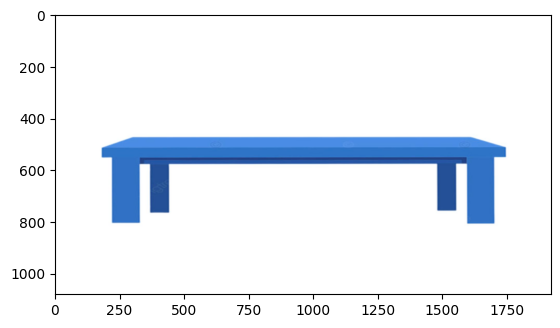

In [5]:
import matplotlib.pyplot as plt

plt.imshow(images[0])

In [6]:
red_hist = cv2.calcHist(
    [images[5]], [2], None, [64], [0, 256]
)
green_hist = cv2.calcHist(
    [images[5]], [1], None, [64], [0, 256]
)
blue_hist = cv2.calcHist(
    [images[5]], [0], None, [64], [0, 256]
)

red_hist.shape

(64, 1)

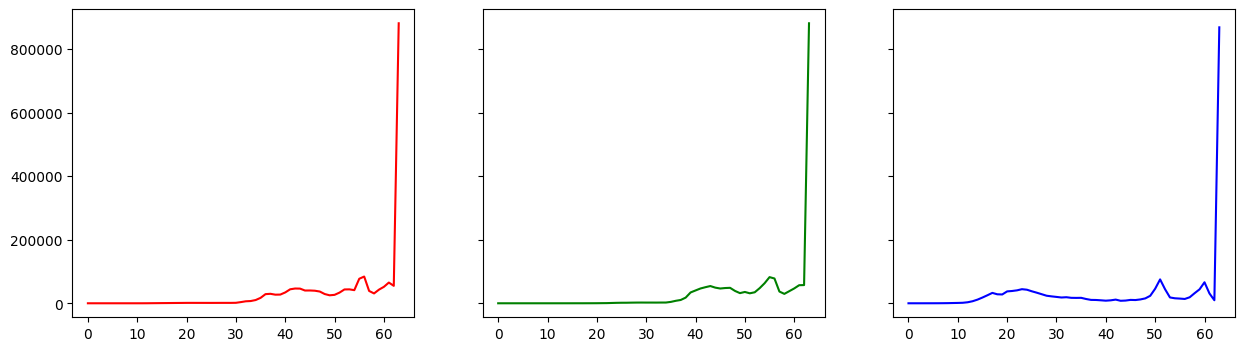

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
axs[0].plot(red_hist, color='r')
axs[1].plot(green_hist, color='g')
axs[2].plot(blue_hist, color='b')
plt.show()

In [8]:
def get_vector_rbg(image, bins=32):
    red = cv2.calcHist(
        [image], [2], None, [bins], [0, 256]
    )
    green = cv2.calcHist(
        [image], [1], None, [bins], [0, 256]
    )
    blue = cv2.calcHist(
        [image], [0], None, [bins], [0, 256]
    )
    vector = np.concatenate([red, green, blue], axis=0)
    vector = vector.reshape(-1)
    return vector

In [9]:
vec = get_vector(images[0])
vec.shape

(96,)

In [10]:
# and do the same for the remainder of our images
image_vectors = []
for image in images:
    image_vectors.append(get_vector(image))

In [11]:
def cosine(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [12]:
rgb_images = [np.flip(image, 2) for image in images]

def search(idx, top_k=3):
    query_vector = image_vectors[idx]
    distances = []
    for _, vector in enumerate(image_vectors):
        distances.append(cosine(query_vector, vector))
    top_idx = np.argpartition(distances, -top_k)[-top_k:]
    return top_idx

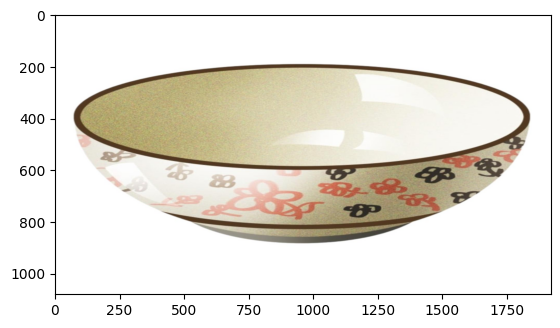

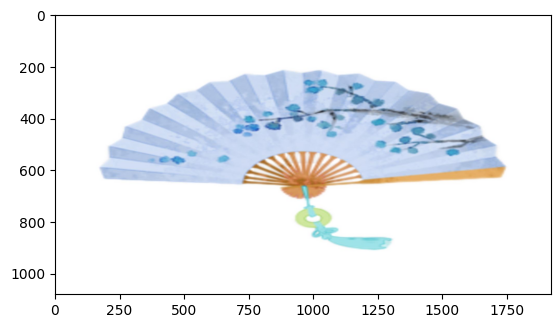

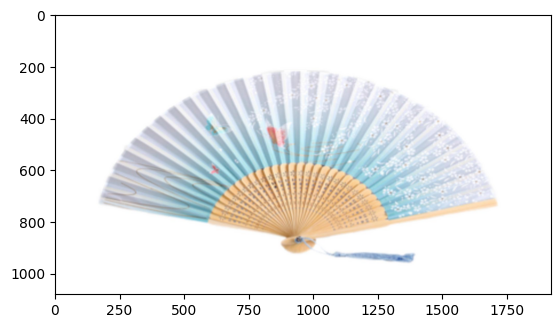

In [15]:
result = search(3)
for i in result:
    plt.imshow(rgb_images[i])
    plt.show()